In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
from scripts.fp_prep_and_hp import df_load
df = df_load()

In [4]:
df['risk_level'] = df['risk_level'].replace({'mid':'low'})

In [5]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 76)

classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

sample_weights = np.array([class_weights_dict[label] for label in y_train])

In [8]:
model = RandomForestClassifier(random_state = 76)

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]  
}

In [10]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=76), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [11]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [12]:
best_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=76)

In [13]:
y_pred = best_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.88      0.81      0.85        27
         low       0.94      0.97      0.95        86

    accuracy                           0.93       113
   macro avg       0.91      0.89      0.90       113
weighted avg       0.93      0.93      0.93       113



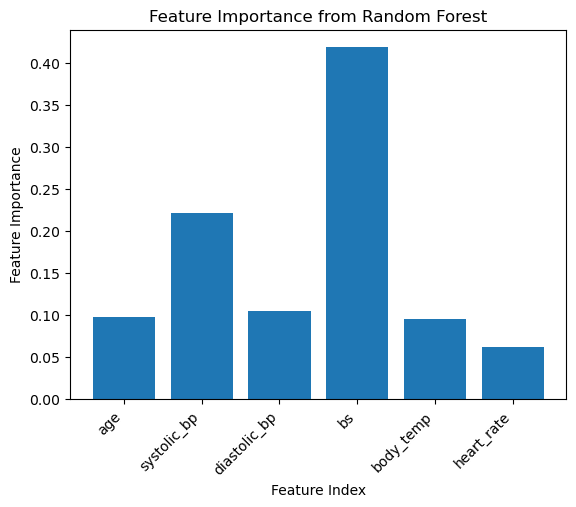

In [15]:
importances = best_model.feature_importances_
feature_names = X.columns.tolist()
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.xticks(range(len(importances)), feature_names, rotation=45, ha='right')
plt.title('Feature Importance from Random Forest')
plt.show()